# Adansons Base MNIST Tutorial


In this tutorial, we will learn some basic features of Adansons Base as follows:
- Creating new project
- Importing dataset and metadeta to link the information
- Incorporating with existing libraries (e.g. PyTorch)

After the completation of this turorial, you should be able to import dataset and metadeta to your Adansons Base project, and effeciently use them in your Machine Learning project.

If you have not get access key for base, please register from here for free  
Invitation Form: https://share.hsforms.com/1KG8Hp2kwSjC6fjVwwlklZA8moen

## Step 0 : Install Adansons Base & Prepare sample dataset

First, install Adansons Base via pip command : 

In [ ]:
!pip install git+https://github.com/adansons/base

### Configuration
when you run any Base CLI command for the first time, Base will ask for your access key.

then, Base will verify the specified access key was correct.

if you don't have an access key, type your email into the form below to join our slack and get the access key.

Invitation Form: https://share.hsforms.com/1KG8Hp2kwSjC6fjVwwlklZA8moen


In [ ]:
# this command will show you what projects you have
!base list

Welcome to Adansons Base!!
Let's start with your access key provided on our slack.
Please register your access_key: xxxxxxxxxx
Successfully configured as xxxx@yyyy.com
projects


We will use MNIST dataset in this tutorial, so download the dataset and install dependencies.

In [ ]:
# install from pyproject.toml
!poetry install
# or
!pip install ../


In [ ]:
!pip install pypng

In [ ]:
!curl -sSL https://raw.githubusercontent.com/adansons/base/main/download_mnist.py > download_mnist.py

In [ ]:
!python3 ./download_mnist.py ~/dataset/mnist

Each MNIST image is stored under the folder of its label name (e.g. 0), and named {file_index}.png as below:  
(if you not have `tree` command and if you use macOS, install it via `brew install tree`)

In [1]:
!tree -d ~/dataset/mnist 

/home/xxxx/dataset/mnist
├── test
│   ├── 0
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   ├── 5
│   ├── 6
│   ├── 7
│   ├── 8
│   └── 9
└── train
    ├── 0
    ├── 1
    ├── 2
    ├── 3
    ├── 4
    ├── 5
    ├── 6
    ├── 7
    ├── 8
    └── 9

22 directories


In [2]:
!tree ~/dataset/mnist/test/0/ | head

/home/xxxx/dataset/mnist/test/0/
├── 10.png
├── 1001.png
├── 1009.png
├── 101.png
├── 1034.png
├── 1047.png
├── 1061.png
├── 1084.png
├── 1094.png


## Step 1: Create new project

You can create new project via `base new` command.  
Here, we will create a project named mnist.

In [5]:
!base new mnist

Your Project UID
----------------
abcdefghij123456789

save Project UID in local file (~/.base/projects)


## Step 2: import data files

Once you have created the project, you can add dataset into your project via `base import` command.   

You have to specify your dataset directory and file extension via `--directory` and `--extension` option.  
Also, you need to specify the parsing rule via `--parse` option; it automatically parses and links dataset information in the path name according to given parsing rule.   
This time, the directory looks like `train/3/302.png`, so we choose the parsing rule `{dataType}/{label}/{id}.png`

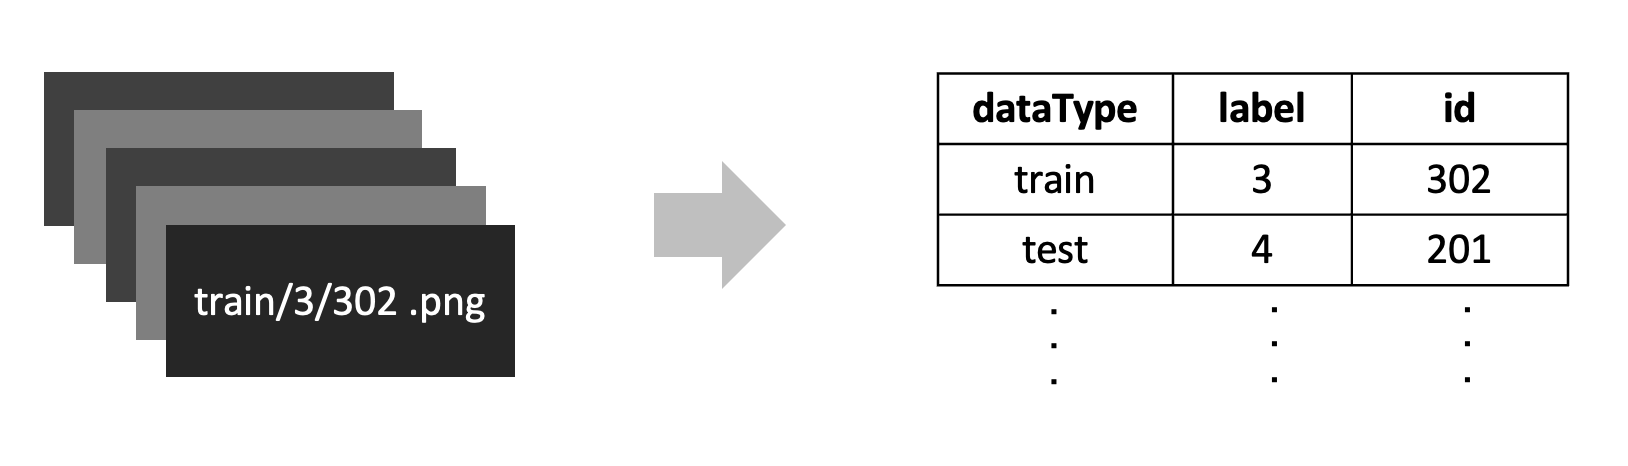

In [9]:
# This could take time depending on the the data amount
# It could take around 3 mins on the MNIST dataset size (= 70000 files)
!base import mnist --directory ~/dataset/mnist --extension png --parse "{dataType}/{label}/{id}.png"

Check datafiles...
found 70000 files with png extension.
Success!


## Step 3. Import external metadata files

The MNIST dataset is known to have misslabeled data.  "wrongImagesInMNISTTestset.xlsx" is the list of the misslabeled data.

Adansons Base can easily import multiple tables in one Excel-sheet file.



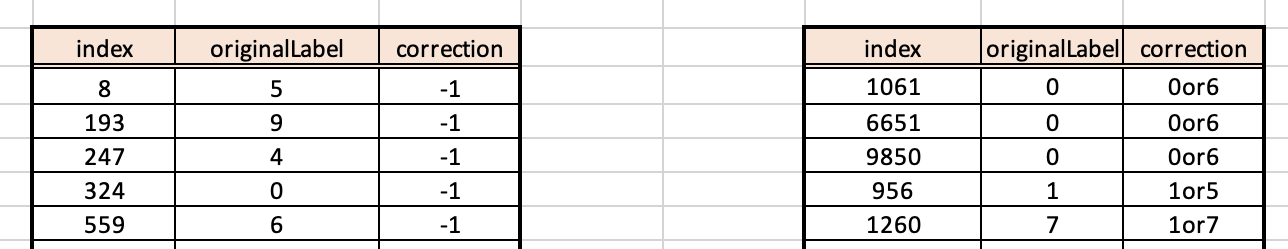

the "correction" may be one of the following values:

-1: we think the image should be discarded. No labels can be attached to it.

a or b: we think the number in the image is ambiguous. Both a and b can be the label of the image.


This sample Excel file was created for demonstration of a powerful function `base import` of Adansons Base.
This data was made with reference to the data bellow.

https://github.com/youkaichao/mnist-wrong-test/blob/master/wrongImagesInMNISTTestset.csv  






<div>

Adansons Base can **automatically** import such metadata file and integrate with your existing project via `--external-file` option in `base import` command.
    
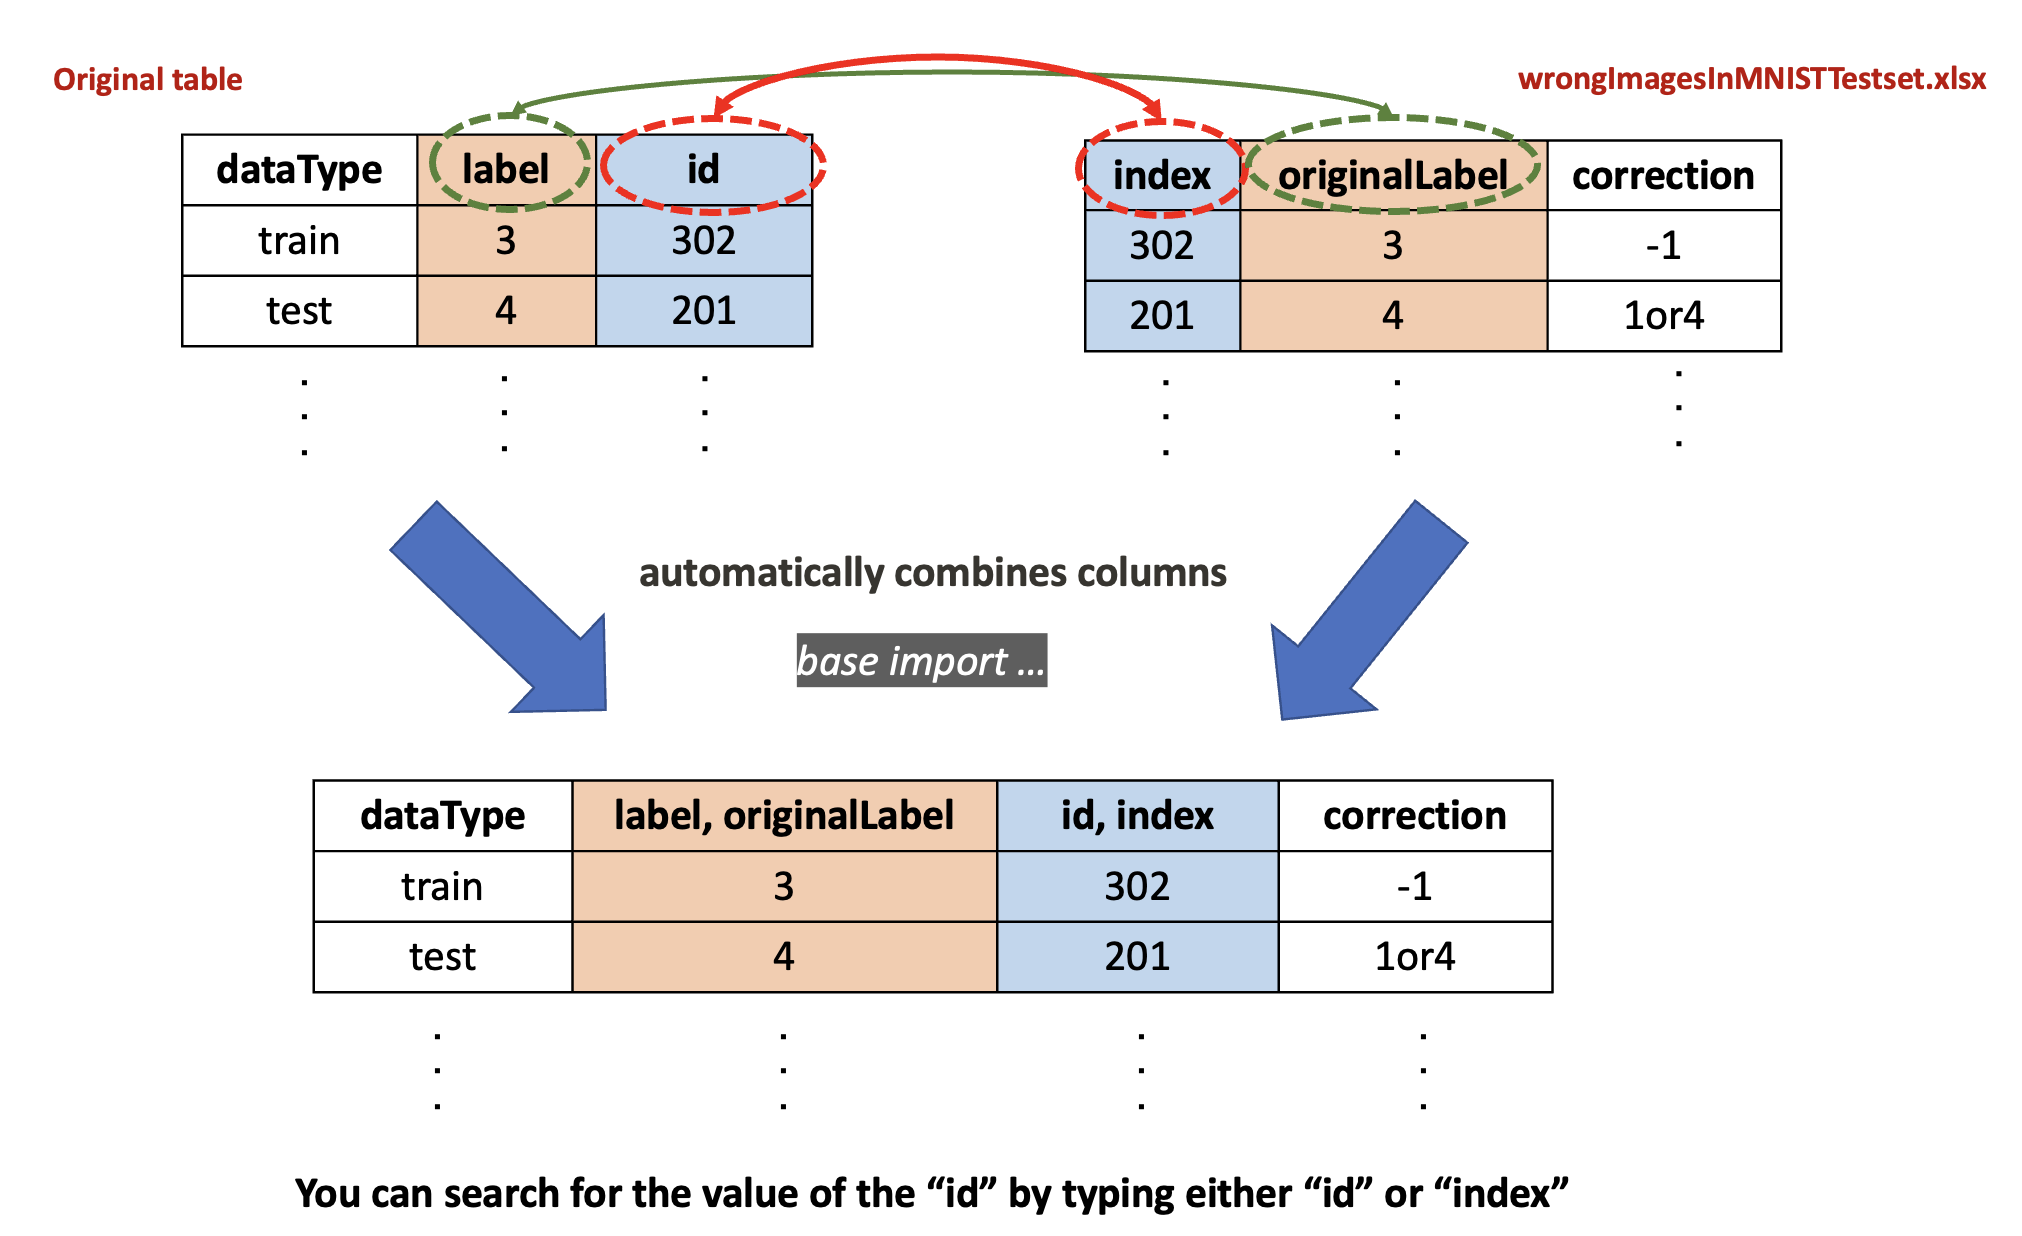


In [10]:
!base import mnist --external-file --path ./wrongImagesInMNISTTestset.xlsx --additional dataType:test --auto-approve

2 tables found!
now estimating the rule for table joining...

1 table joining rule was estimated!
Below table joining rule will be applied...


Rule no.1

	key 'index'	->	connected to 'id' key on exist table
	key 'originalLabel'	->	connected to 'label' key on exist table
	key 'correction'	->	newly added
	key 'dataType'	->	connected to 'dataType' key on exist table

2 tables will be applied
Table 1 sample record:
	{'index': 8, 'originalLabel': 5, 'correction': -1, 'dataType': 'test'}
Table 2 sample record:
	{'index': 1061, 'originalLabel': 0, 'correction': '0or6', 'dataType': 'test'}
Success!


## Step 4. filter and export dataset with CLI  
Now we are ready to filter and export dataset integrated with metadata.   
Let’s pick up a part of data files, label is 1, 2, or 3 for training, from project mnist with `base search <project>` command.  
You can use `--conditions <value-only-search>` option for magical search filter and `--query <key-value-pair-search>` option for advanced filter.  
Be careful that you may get so large output on your console without -s, --summary option.

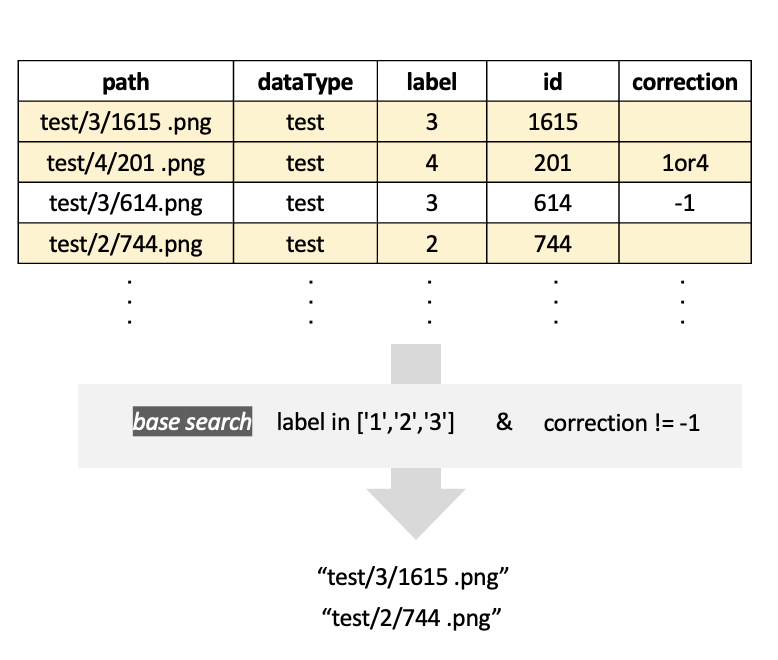

You can also speficy several queries by set multiple `--query` option.  
Below example is picking files labeled 1,2 or 3 **and** their `correction` is not `-1` from test data.

In [12]:
!base search mnist --conditions "test" --query "correction != -1" --query "label in ['1','2','3']" | head

3169 files
{'FilePath': '/home/xxxx/dataset/mnist/test/3/1615.png', 'id': '1615', 'index': 1615, 'label': '3', 'originalLabel': 3, 'dataType': 'test'}
{'FilePath': '/home/xxxx/dataset/mnist/test/3/614.png', 'id': '614', 'index': 614, 'label': '3', 'originalLabel': 3, 'dataType': 'test'}
{'FilePath': '/home/xxxx/dataset/mnist/test/2/4339.png', 'id': '4339', 'index': 4339, 'label': '2', 'originalLabel': 2, 'dataType': 'test'}
{'FilePath': '/home/xxxx/dataset/mnist/test/2/4870.png', 'id': '4870', 'index': 4870, 'label': '2', 'originalLabel': 2, 'dataType': 'test'}
{'FilePath': '/home/xxxx/dataset/mnist/test/3/4494.png', 'id': '4494', 'index': 4494, 'label': '3', 'originalLabel': 3, 'dataType': 'test'}
{'FilePath': '/home/xxxx/dataset/mnist/test/2/744.png', 'id': '744', 'index': 744, 'label': '2', 'originalLabel': 2, 'dataType': 'test'}
{'FilePath': '/home/xxxx/dataset/mnist/test/3/677.png', 'id': '677', 'index': 677, 'label': '3', 'originalLabel': 3, 'dataType': 'test'}
{'FilePath': '/hom

In [11]:
!base search mnist --conditions "train" --query "label in ['1','2','3']" | head

18831 files
{'FilePath': '/home/xxxx/dataset/mnist/train/1/41744.png', 'id': '41744', 'index': 41744, 'label': '1', 'originalLabel': 1, 'dataType': 'train'}
{'FilePath': '/home/xxxx/dataset/mnist/train/1/46210.png', 'id': '46210', 'index': 46210, 'label': '1', 'originalLabel': 1, 'dataType': 'train'}
{'FilePath': '/home/xxxx/dataset/mnist/train/2/55704.png', 'id': '55704', 'index': 55704, 'label': '2', 'originalLabel': 2, 'dataType': 'train'}
{'FilePath': '/home/xxxx/dataset/mnist/train/3/4281.png', 'id': '4281', 'index': 4281, 'label': '3', 'originalLabel': 3, 'dataType': 'train'}
{'FilePath': '/home/xxxx/dataset/mnist/train/3/15651.png', 'id': '15651', 'index': 15651, 'label': '3', 'originalLabel': 3, 'dataType': 'train'}
{'FilePath': '/home/xxxx/dataset/mnist/train/1/4405.png', 'id': '4405', 'index': 4405, 'label': '1', 'originalLabel': 1, 'dataType': 'train'}
{'FilePath': '/home/xxxx/dataset/mnist/train/1/10268.png', 'id': '10268', 'index': 10268, 'label': '1', 'originalLabel': 1, 

## Step 5. filter and export dataset with Python SDK

In python script, you can filter and export dataset easily and simply with Project class and Files class. (see [SDK docs](https://vast-bus-1c4.notion.site/Python-Reference-e4b62aee4eee47caa96b7f436d6658cd))

In [ ]:
!pip install NumPy pillow torch torchvision

In [1]:
from base import Project, Dataset
import numpy as np
from PIL import Image


# export dataset as you want to use
project = Project("mnist")
files = project.files(conditions="train", query=["label in ['1','2','3']"])

print(f'File path : {files[0]}')
# this returns path-like `File` object
# -> '/home/xxxx/dataset/mnist/0/12909.png'
print(f'Label : {files[0].label}')
# this returns the value of attribute 'lable' ofn first `File` object
# -> '0'

File path : /Users/yushi/dataset/mnist/train/1/41744.png
Label : 1


In [10]:
len(files.items)

18831

In [3]:
# function to load image from path
# this is necessary, if you want to use image in your dataset
# because base Dataset class doesn't convert path to image
preprocess_func(path):
    image = Image.open(path)
    image = image.resize((28, 28))
    image = np.array(image)
    return image

dataset = Dataset(files, target_key="label", transform=preprocess_func)

x_train, x_test, y_train, y_test = dataset.train_test_split(split_rate=0.2)

In [38]:
# you can also use the dataset object like this.
for data, label in dataset:
    # data: a image-data. ndarray
    # label: the label of a image-data, like 0
    pass

Base SDK's `Dataset` class is compatible with PyTorch.   
So you can instanciate Base's `Dataset` to filter your dataset, and directly use it with PyTorch's `DataLoader`.

In [ ]:
# or use with torch
!pip install torch

In [14]:
import torch
import torchvision.transforms as transforms
from PIL import Image
# function to load image from path
# this is necessary, if you want to use image in your dataset
# because base Dataset class doesn't convert path to image
def preprocess_func(path):
    image = transforms.ToTensor()(transforms.Resize((28, 28))(Image.open(path)))
    return image

dataset = Dataset(files, target_key="label", transform=preprocess_func)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

Finally, let’s try one of most characteristic use cases on Adansons Base.

in the external file you imported in step.3, some mnist test data files are annotated as “-1” in correction column. this means that it is difficult to classify that files even for human.

so, you should exclude that files from your dataset to evaluate your AI models more properly.

In [15]:
# you can exclude files which have "-1" on "correction" with below code
eval_files = project.files(conditions="test", query=["correction != -1"])

print(f'Eval file length : {len(eval_files)}')
# this returns the number of files matched with requested conditions or query
# -> 9963

eval_dataset = Dataset(eval_files, target_key="label", transform=preprocess_func)

Eval file length : 9963


## Delete tutorial project

You can archive your project via `base rm` command

In [16]:
!base rm mnist

mnist was Archived


You can delete your archived project via `base rm --confirm`

In [17]:
!base rm --confirm mnist

mnist was Deleted
